## 1. Prepare data

### 1.1 Generate simulated data

In [44]:
using TorusEvol
using Distributions

# Underlying evolutionary process
t = 0.3; λ=0.03; μ=0.0308; r=0.4
τ = TKF92([t], λ, μ, r)
S = WAG_SubstitutionProcess()
μ_𝜙=-2.0; μ_𝜓=2.35; σ_𝜙=0.1; σ_𝜓=0.1; α_𝜙=0.5; α_𝜓=1.0; α_cov=0.1; γ=0.2
Θ = JumpingWrappedDiffusion(μ_𝜙, μ_𝜓, σ_𝜙, σ_𝜓, α_𝜙, α_𝜓, α_cov, γ)
Θ2 = JumpingWrappedDiffusion(-1.0, -1.0, 0.5, σ_𝜓, α_𝜙, α_𝜓, α_cov, γ)
ξ = ProductProcess(S, Θ)
ξ2 = MixtureProductProcess([0.9, 0.1], [S S; Θ Θ2])
pair_chain_dist = ChainJointDistribution(ξ2, τ)

# Generate data
simulated_data = Tuple{ObservedChain, ObservedChain}[]
n = 3 # data size
for i ∈ 1:n
    push!(simulated_data, rand(pair_chain_dist))
end

# Render a random sample from the data
(A, B) = rand(simulated_data)
chainA = from_primary_dihedrals(Int.(data(A)[1]), data(A)[2])
chainB = from_primary_dihedrals(Int.(data(B)[1]), data(B)[2])
lp = logpdf(pair_chain_dist, (A, B))
print("The log pdf of A and B is $lp")
render(chainA, chainB; aligned=true)

The log pdf of A and B is -59.94506065138434

[ Info: Superimposing based on a sequence alignment between 73 residues
[ Info: Superimposing based on 73 atoms
[ Info: Model 1 with 2 chains (1,2), 148 residues, 590 atoms


HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

### 1.2 Load real data

## 2. Parameter Inference Bayesian Model

### 2.1 Set up priors for evolutionary processes

In [31]:
using Turing, DynamicPPL
using LinearAlgebra
using LogExpFunctions 
using Plots, StatsPlots
using Random

import Base: length, eltype
import Distributions: _rand!, logpdf

Turing.setprogress!(true)

struct ScaledBeta <: ContinuousUnivariateDistribution 
    be::Beta 
    function ScaledBeta(α::Real, β::Real)
        new(Beta(α, β))
    end
end
Distributions.rand(rng::AbstractRNG, d::ScaledBeta) = rand(d.be)*2 - 1
Distributions.logpdf(d::ScaledBeta, x::Real) = logpdf(d.be, (x+1) / 2)


struct CompetingExponential <: ContinuousMultivariateDistribution 
    ex::Exponential
    function CompetingExponential(rate::Real)
        new(Exponential(rate))
    end
end 
Base.eltype(d::CompetingExponential) = Float64 
Base.length(d::CompetingExponential) = 2

function Distributions._rand!(rng::AbstractRNG, d::CompetingExponential, x::AbstractVector{<:Real})
    λ = rand(rng, d.ex)
    μ = rand(rng, d.ex)
    if λ > μ 
        tmp = λ; λ = μ; μ=tmp 
    end
    x .= [λ, μ]
    return x
end

function Distributions._logpdf(d::CompetingExponential, x::AbstractArray)
    if x[1] > x[2]
        return -Inf
    end
    return log(2) + logpdf(d.ex, x[1]) + logpdf(d.ex, x[2])
end

@model function tkf92_prior()
    λμ ~ CompetingExponential(1.0)
    λ = λμ[1]; μ = λμ[2]
    r ~ Uniform(0.0, 1.0)

    # Require birth rate lower than death rate
    if λ > μ || λ ≤ 0 || μ ≤ 0 || r ≤ 0 || r ≥ 1
        μ = NaN; λ = NaN
    end
    return λ, μ, r
end;

@model function jwndiff_prior()
    μ ~ filldist(Uniform(-π, π), 2)
    σ² ~ filldist(Gamma(π * 0.1), 2)
    α ~ filldist(Gamma(π * 0.1), 2)
    γ ~ Exponential(1.0)   # jumping rate
    α_corr ~ ScaledBeta(3, 3)
    
    # Require valid covariance matrices
    if any(σ² .≤ 0) || any(α .≤ 0) || γ ≤ 0 
        σ² .= NaN; α .= NaN; γ = NaN
    end
    α_cov = α_corr * sqrt(α[1] * α[2])
    if α_cov^2 > α[1]*α[2]
         α_cov = NaN
    end
    
    return μ[1], μ[2], sqrt(σ²[1]), sqrt(σ²[2]), α[1], α[2], α_cov, γ
end;

[ Info: [Turing]: progress logging is enabled globally
[ Info: [AdvancedVI]: global PROGRESS is set as true


### 2.2 Set up sampler

In [33]:
torus_proposal(v) = MixtureModel([WrappedNormal(v, I), WrappedNormal(v, 20*I)], [0.8, 0.2])
mv_rw_proposal(v::AbstractVector, cov) = MvNormal(v, cov)
rw_proposal(x, var) = Normal(x, var)


sampler = Gibbs(MH(:t => v -> rw_proposal(v, 0.2)),
                MH(Symbol("Θ.μ") => v -> torus_proposal(v)),
                MH(Symbol("Θ.σ²") => v -> mv_rw_proposal(v, 0.4*I)),
                MH(Symbol("Θ.α") => v -> mv_rw_proposal(v, 0.4*I)),
                MH(Symbol("Θ.α_corr") => x -> rw_proposal(x, 0.5)),
                MH(Symbol("Θ.γ") => x -> rw_proposal(x, 0.5)),
                MH(Symbol("τ.λμ") => v -> mv_rw_proposal(v, [0.4 0.1; 0.1 0.6])),
                MH(Symbol("τ.r") => x -> rw_proposal(x, 0.5))
               );

In [35]:
using Memoization 

@memoize get_αs(pairs) = get_α.(Ref(TKF92([1.0], 0.2, 0.3, 0.4)), pairs)
@memoize get_Bs(pairs) = get_B.(pairs);

### 2.3 Prepare probabilistic model

In [36]:
using TimerOutputs

@model function pair_param_inference_simple(pairs)
    # ____________________________________________________________________________________________________
    # Step 1 - Sample prior parameters
    
    # Time parameter
    t ~ Exponential(1.0) 
    # Alignment parameters
    @submodel prefix="τ" Λ = tkf92_prior()
    # Dihedral parameters 
    @submodel prefix="Θ" Ξ = jwndiff_prior()
    # Check parameter validity 
    if t ≤ 0 || any(isnan.(Ξ)) || any(isnan.(Λ))
        Turing.@addlogprob! -Inf; return
    end
    
    # ____________________________________________________________________________________________________
    # Step 2 - Construct processes 
    
    # Substitution Process - no parameters for simplicity, use fully empirical model
    S = WAG_SubstitutionProcess()
    # Dihedral Process
    Θ = JumpingWrappedDiffusion(Ξ...)
    # Joint sequence-structure site level process with one regime
    ξ = ProductProcess(S, Θ)
    
    # Alignment model
    τ = TKF92([t], Λ...)
    
    # Chain level model
    Γ = ChainJointDistribution(ξ, τ)
    
    # ____________________________________________________________________________________________________
    # Step 3 - Observe each pair X, Y by proxy of their joint probability, marginalising over alignments
    α = get_αs(pairs)
    B = get_Bs(pairs)
    for i ∈ eachindex(pairs)
        X, Y = pairs[i]
        # (X, Y) ~ ChainJointDistribution(ξ, τ)
        fulljointlogpdf!(B[i], ξ, t, X, Y)
        Turing.@addlogprob! logpdfαB!(α[i], B[i], Γ, (X, Y))
    end
        
    return Γ
end;

### 2.4 Sample from the model and check results

In [41]:
num_samples = 20
num_chains = 3
model = pair_param_inference_simple(simulated_data);
#chain = sample(model, sampler, MCMCThreads(), num_samples, num_chains)

Sampling (3 threads): 100%|█████████████████████████████| Time: 0:01:08


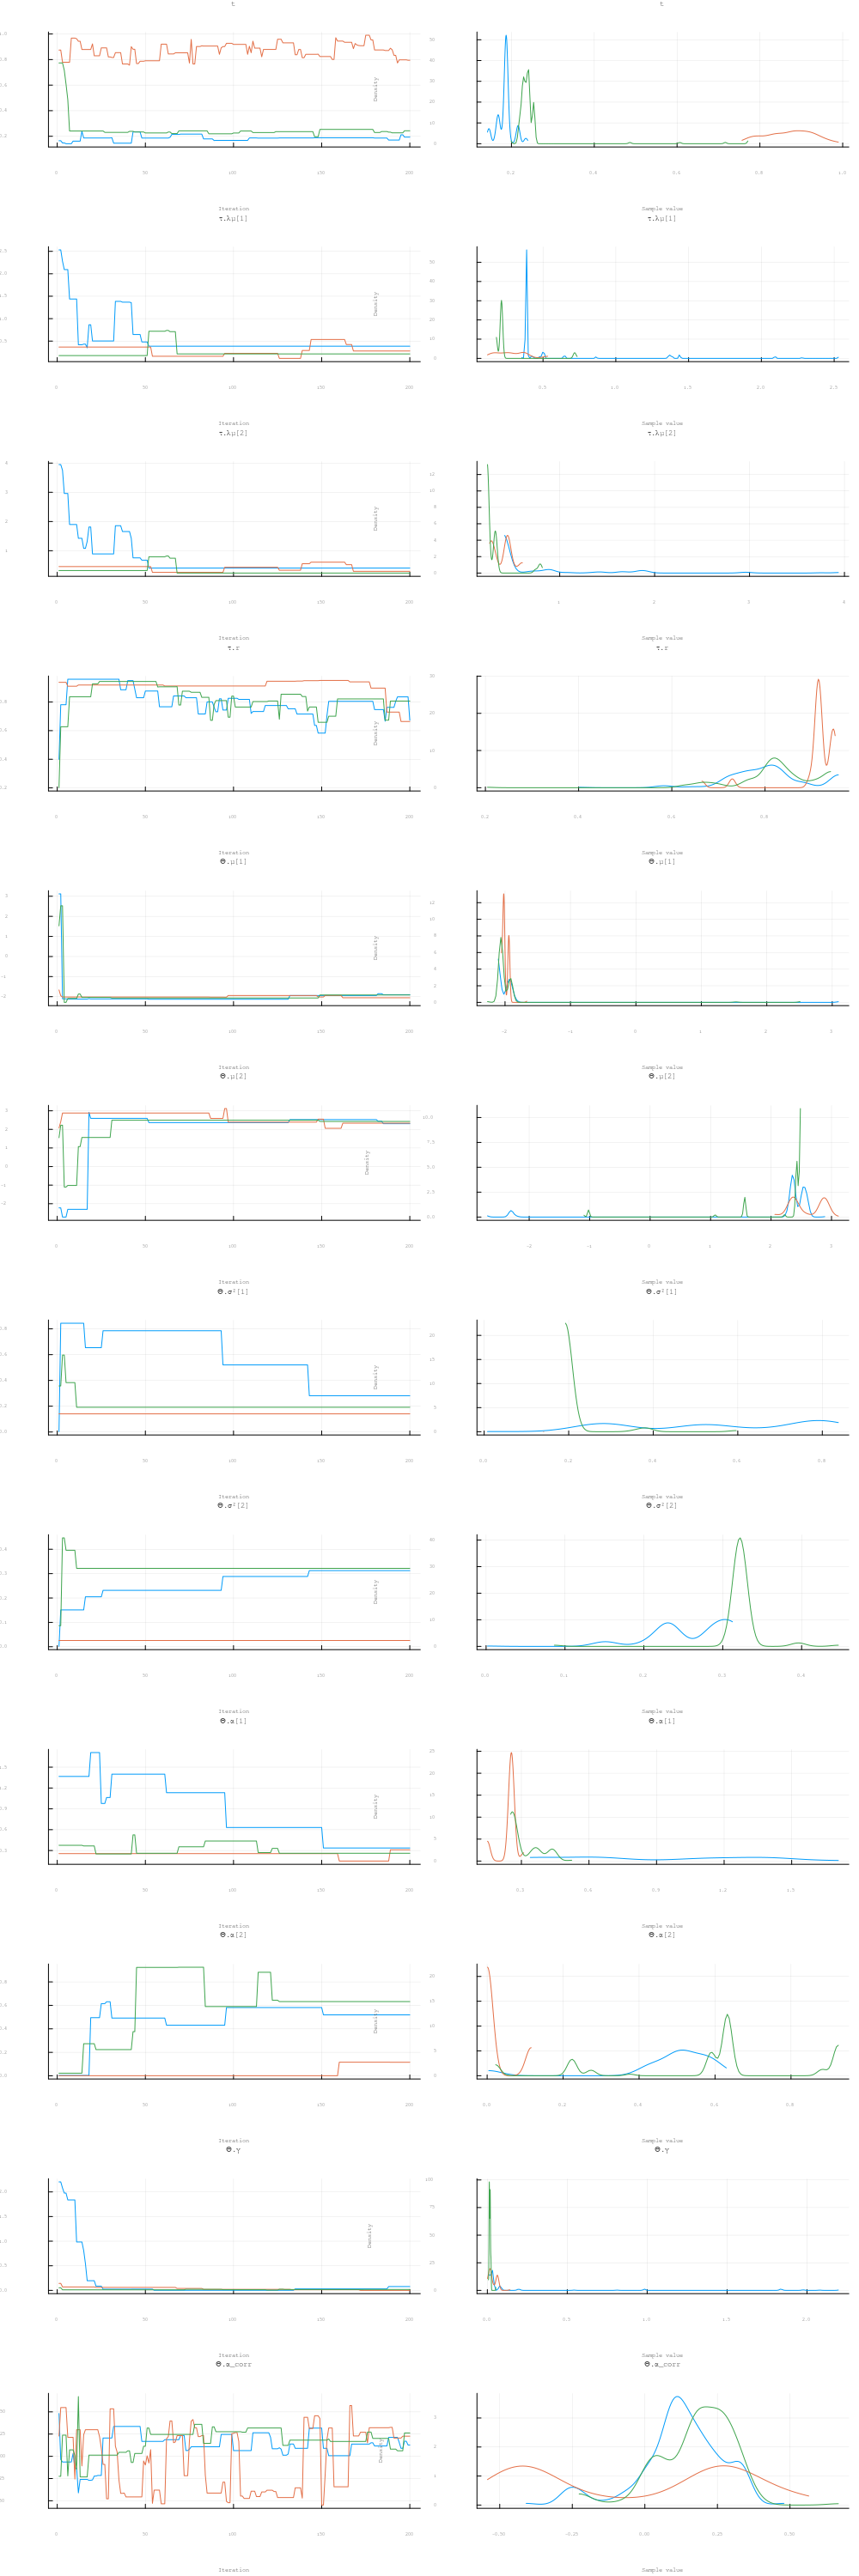

GKS: could not find font JuliaMono.ttf


In [7]:
chain = sample(model, sampler, MCMCThreads(), num_samples, num_chains)
p = plot(chain, fontfamily="JuliaMono")

In [8]:
chain

Chains MCMC chain (200×13×3 Array{Float64, 3}):

Iterations        = 1:1:200
Number of chains  = 3
Samples per chain = 200
Wall duration     = 1529.99 seconds
Compute duration  = 4494.8 seconds
parameters        = t, τ.λμ[1], τ.λμ[2], τ.r, Θ.μ[1], Θ.μ[2], Θ.σ²[1], Θ.σ²[2], Θ.α[1], Θ.α[2], Θ.γ, Θ.α_corr
internals         = lp

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           t    0.4346    0.3145    0.1753     3.8539    16.4287    2.3969     ⋯
     τ.λμ[1]    0.3578    0.2889    0.0889     6.8312    12.0980    1.3935     ⋯
     τ.λμ[2]    0.4618    0.4170    0.1352     5.5624     3.8768    1.5371     ⋯
         τ.r    0.8486    0.0932    0.0311     9.3450    12.1671    1.2728     ⋯
      Θ.μ[1]   -1.9881    0.4277    0.0271     8.3139     9.8606    1.2808     ⋯
      Θ.μ[2]    2.2856    0.9275    0.2205     7.5489    17.2679    1.3882     ⋯
    